# Simple Linear Regression Model

Fot this model we will fit the simple linear regression model to an independent variable which we will determine later on, and to the dependent variable saleprice.

In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Loading the cleaned data
train = pd.read_csv('../datasets/train_cleaned.csv')
test = pd.read_csv('../datasets/test_cleaned.csv')

In [5]:
train.shape

(2051, 81)

In [6]:
test.shape

(878, 80)

In [7]:
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,0.0,13517,Pave,Not,IR1,Lvl,...,0,0,Not,Not,Not,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,Not,IR1,Lvl,...,0,0,Not,Not,Not,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,Not,Reg,Lvl,...,0,0,Not,Not,Not,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,Not,Reg,Lvl,...,0,0,Not,Not,Not,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,Not,IR1,Lvl,...,0,0,Not,Not,Not,0,3,2010,WD,138500


In [8]:
test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,Not,Not,Not,0,4,2006,WD
1,2718,905108090,90,RL,0.0,9662,Pave,Not,IR1,Lvl,...,0,0,0,Not,Not,Not,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,Not,IR1,Lvl,...,0,0,0,Not,Not,Not,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,Not,Reg,Lvl,...,0,0,0,Not,Not,Not,0,7,2007,WD
4,625,535105100,20,RL,0.0,9500,Pave,Not,IR1,Lvl,...,0,185,0,Not,Not,Not,0,7,2009,WD


In [9]:
train['saleprice'] = np.log1p(train['saleprice'])

Lets check the distribution of saleprice and see if we should transform it.

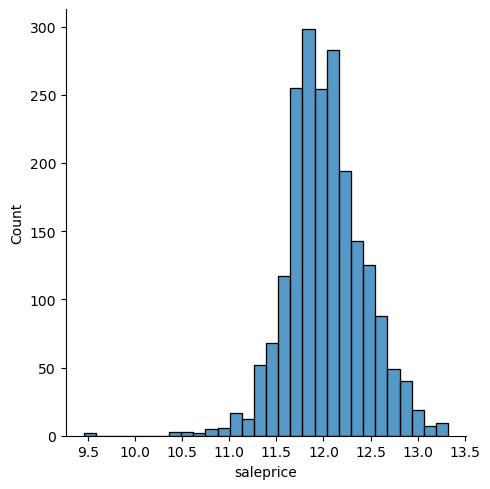

In [11]:
sns.displot(train, x="saleprice", bins=30)

We will want to go back and log transform it since it is quite skewed.

In [13]:
# Train test split
X = train[['overall_qual']]
y = train['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Init and fitting model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
# Making the predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [16]:
# R squared of train
r2_score(y_train, y_train_pred)

0.6720257466847941

In [17]:
# RMSE of train
np.sqrt(mean_squared_error(y_train, y_train_pred))

0.2335372383366642

In [18]:
# R sqaured of test
r2_score(y_test, y_test_pred)

0.694589401452258

In [19]:
# RMSE of test
np.sqrt(mean_squared_error(y_test, y_test_pred))

0.234606185258907

**TRY 1**
We got low RMSE scores, test was 44,055 and train was 48351. r2 of train is 63.25 percent and test is 67.33 percent. We could be suffering from underrfitting. Next try we will see if transforming saleprice to log to follow a normal distribution would help.

**TRY 2** with log transformation of saleprice, the r2 of train is 67.20 percent and r2 of test is 69.45 percent. This seems like a slight improvement. I will apply this to actual kaggle test as a submission to see the results.

In [21]:
# Submission
preds = lr.predict(test[['overall_qual']])

In [22]:
# fitting to kaggle format
submission = pd.DataFrame({'id': test['id']})
submission['saleprice'] = preds
submission.describe()

,id,saleprice
count,878.000000,878.000000
mean,1444.749431,12.010675
std,850.838263,0.321243
min,2.000000,11.060339
25%,692.250000,11.764272
50%,1433.000000,11.998916
75%,2197.500000,12.233561
max,2928.000000,12.937494


In [23]:
# converting log units back to regular units.
submission['saleprice'] = np.expm1(submission['saleprice'])

In [24]:
submission.describe()

,id,saleprice
count,878.000000,878.000000
mean,1444.749431,173459.361903
std,850.838263,59461.280137
min,2.000000,63597.085646
25%,692.250000,128574.537796
50%,1433.000000,162577.502246
75%,2197.500000,205572.858337
max,2928.000000,415605.368088


In [25]:
# Saving ou submission into CSV
submission.to_csv('../datasets/slr_model_submission.csv', index=False)

That was an improvement! In Kaggle, our rmse improved from 48585 to 44399! That does it for simple linear regression, our data needs a more complicated model. We will next try an MLR model which will take into account more variables.